- By Renzo Tanaka-Wong
- October 28th, 2020

I aﬀirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 5

## Problem 1: Faceted Histogram

Run the following code block to define a function which generates two 1-dimensional `numpy` arrays. The first array, called `groups`, consists of integers between `0` and `n_groups-1`, inclusive. The second array, called `data`, consists of real numbers. 

In [4]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

## Part A

Write a function called `facet_hist()`. This function should accept five arguments: 

1. `groups`, the `np.array` of group labels as output by `create_data()`. 
2. `data`, the `np.array` of data as output by `create_data()`.
3. `m_rows`, the number of desired rows in your faceted histogram (explanation coming). 
4. `m_cols`, the number of desired columns in your faceted histogram (explanation coming). 
5. `figsize`, the size of the figure. 

Your function will create faceted histograms -- that is, a separate axis and histogram for each group. For example, if there are six groups in the data, then you should be able to use the call 

```
facet_hist(groups, data, m_rows = 2, m_cols = 3, figsize = (6,4))
```

to create a plot like this: 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram.png
" alt="An array of six histograms, depicting bell-curve data, with two rows and three columns. Each histogram is labeled with one of the six group labels." width="400px">
</figure>

It's fine if your group labels run left-to-right (so that the top row has labels 0, 1, and 2 rather than 0, 2, 4). 


You should also be able to change the orientation by modifying `m_rows`, `m_cols`, and `figsize`. 

```
facet_hist(groups, data, m_rows = 3, m_cols = 2, figsize = (4,6))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_2.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels." width="300px">
</figure>

### Requirements: 

1. Your function should work **whenever `m_rows*m_cols` is equal to the total number of groups.** Your function should first check that this is the case, and raise an informative `ValueError` if not. You may assume that there is at least one data point for each group label in the data supplied. 
2. You should include a horizontal axis label (of your choice) along **only the bottom row** of axes. 
3. You should include a vertical axis label (e.g. "Frequency") along **only the leftmost column of axes.**
4. Each axis should have an axis title of the form "Group X", as shown above. 
5. Comments and docstrings! 

### Hints

- If your plots look "squished," then `plt.tight_layout()` is sometimes helpful. Just call it after constructing your figure, with no arguments. 
- Integer division `i // j` and remainders `i % j` are helpful here.  


In [5]:
# your function facet_hist() here
def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    """
    This function creates facteted histograms based on a user-specified
    number of rows and columns and fig size. Aditionally, the function labels groups 
    up to down from the left to right. The kwargs parameter allows for additional 
    arguments to further cuztomize the resulting plots.
    """
    # Raise ValueError if the total number of groups doesn't match the columns times rows
    if len(set(groups)) != m_rows*m_cols:
        raise ValueError("m_rows*m_cols must equal the total number of groups")
   
    # Initialize a variable for figsize based on a user-specified value
    size = figsize
    
    # Create the plot based on the spcified dimensions
    fig, ax = plt.subplots(m_rows, m_cols, figsize = size)


    
    counter = 0
    
    # Iterate over columns index then row index so that the fucntion runs from up to down
    for i in range(m_cols):
        for j in range(m_rows):
            # Create a histogram and label for each index, use kwargs for additional arguments
            ax[j,i].hist(data[groups == counter], **kwargs)
            ax[j,i].set(title = "Group {0}".format(counter))
            plt.tight_layout()
            # Label the y-axis for the fisrt column
            if i == 0:
                ax[j,i].set(ylabel = "Density")
            # Label the x-axis for the bottom row
            if j == m_rows - 1:
                ax[j,i].set(xlabel = "x")
                
            counter += 1

        


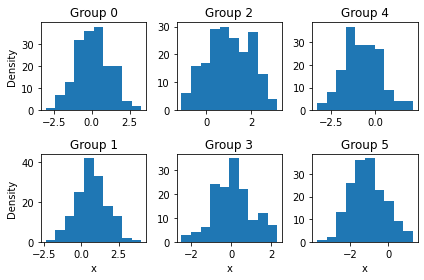

In [6]:
# test code -- run this!
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4)) 

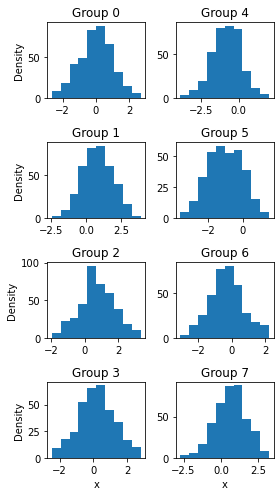

In [7]:
# test code -- run this!
groups, data = create_data(3000, 8)
facet_hist(groups, data, 4, 2, figsize = (4, 7))

## Part B

Modify your function (it's ok to modify it in place, no need for copy/paste) so that it accepts additional `**kwargs` passed to `ax.hist()`. For example,  

```
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")
```

should produce 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_3.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels. The histograms are now colored pink and are slightly transparent.|" width="400px">
  <figcaption><i>Example output.</i></figcaption>
</figure>

You should be able to run this code **without defining parameters `alpha` and `color` for `facet_hist()`**. 

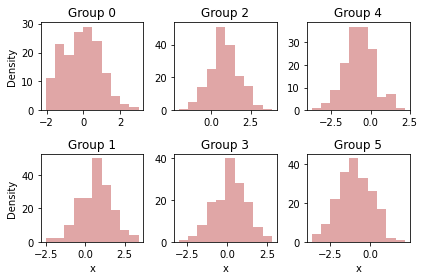

In [8]:
# test code -- run this! 
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2019 World Happiness Report. 

In [9]:
import urllib
import pandas as pd
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. The intended values of url are:     
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)
        
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/world_happiness_report/2019.csv")
happiness = pd.read_csv("data.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


What you're seeing right now is a `pandas` data frame. You don't have to know what that is right now -- no worries! Just observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

[Text(0, 0.5, 'Healthy Life expectancy'),
 Text(0.5, 0, 'Happiness Score'),
 Text(0.5, 1.0, 'Happiness Score Vs. Healthy Life Expectancy')]

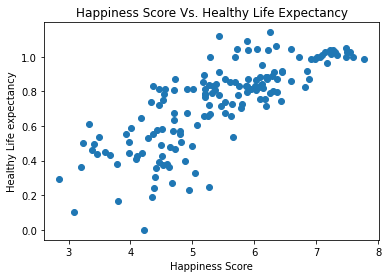

In [10]:
# your plotting code here
fig, ax = plt.subplots(1)
# Plot Score against Healthy Life Expectancy
ax.scatter(happiness["Score"], happiness["Healthy life expectancy"])
# Create associated axis labels and title
ax.set(xlabel = "Happiness Score", ylabel = "Healthy Life expectancy", title = "Happiness Score Vs. Healthy Life Expectancy")

There appears to be a positive correlation between the happiness score of a country and it's healthy life expectancy. This is evident from the linear trend in the data: increasing values along the x-axis (Happiness Score) are correlated with higher y-axis (Healthy life expectancy) values.

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

In [11]:
# your function scatterplot_matrix here
import numpy as np

def scatterplot_matrix(cols, figsize):
    """
    This function creates a n x n matrix of scatter plots that shows the correlation 
    between each of n variables, where n is the number of variables in the list.
    Plots where the same variable is comapred are left blank
    """
    # Intialize a variable for the user-specified figsize
    size = figsize
    # Create plot with dimension based on the provided list of variables and figsize
    fig, ax = plt.subplots(len(cols), len(cols), figsize = size)
    # Sicne the matrix is a square, iterate over the number of columns twice to get right index
    for i in range(len(cols)):
        for j in range(len(cols)):
            # Label the title and y-axis of each plot with the corresponding labels
            ax[j,i].set(title = cols[j])
            ax[j,i].set(ylabel = cols[i])
            # Plot if the variables being compared are different
            if i != j:
                ax[i,j].scatter(happiness[cols[i]], happiness[cols[j]])
                # Label the x-axis with the correlation coefficient
                ax[i,j].set(xlabel = r"$\rho$ = " + str(np.round(np.corrcoef(happiness[cols[i]], happiness[cols[j]])[0][1], 2)))
                plt.tight_layout()

                
                

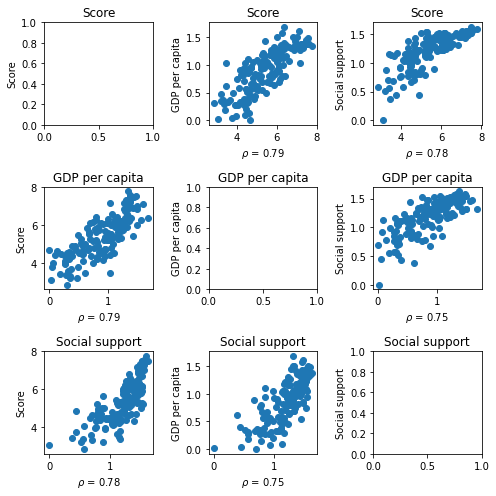

In [12]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
cols = ["Score", 
        "GDP per capita", 
        "Social support"]

scatterplot_matrix(cols, figsize = (7,7))

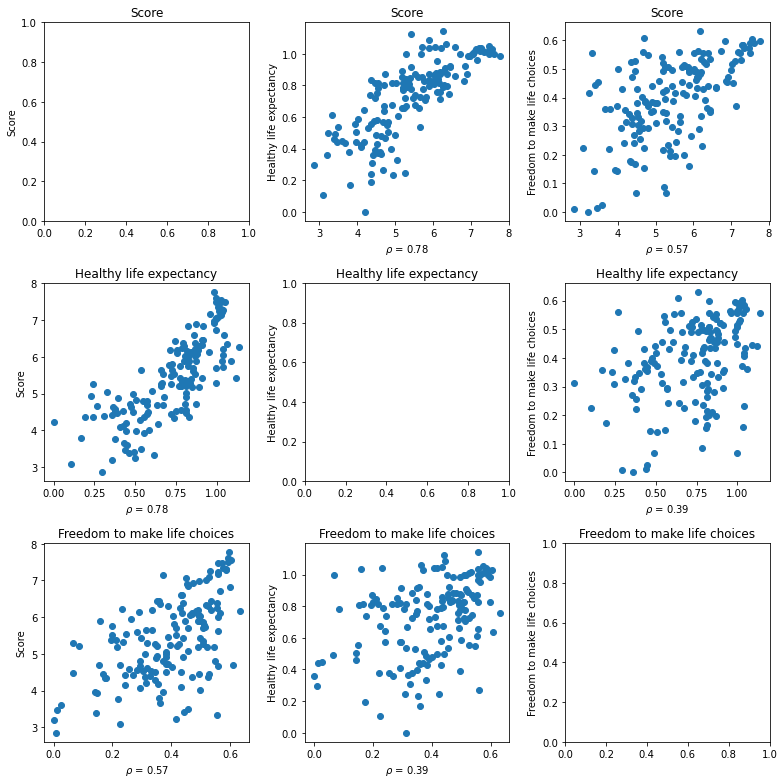

In [13]:
cols = ["Score", 
        "Healthy life expectancy", 
        "Freedom to make life choices"]

scatterplot_matrix(cols, figsize = (11,11))

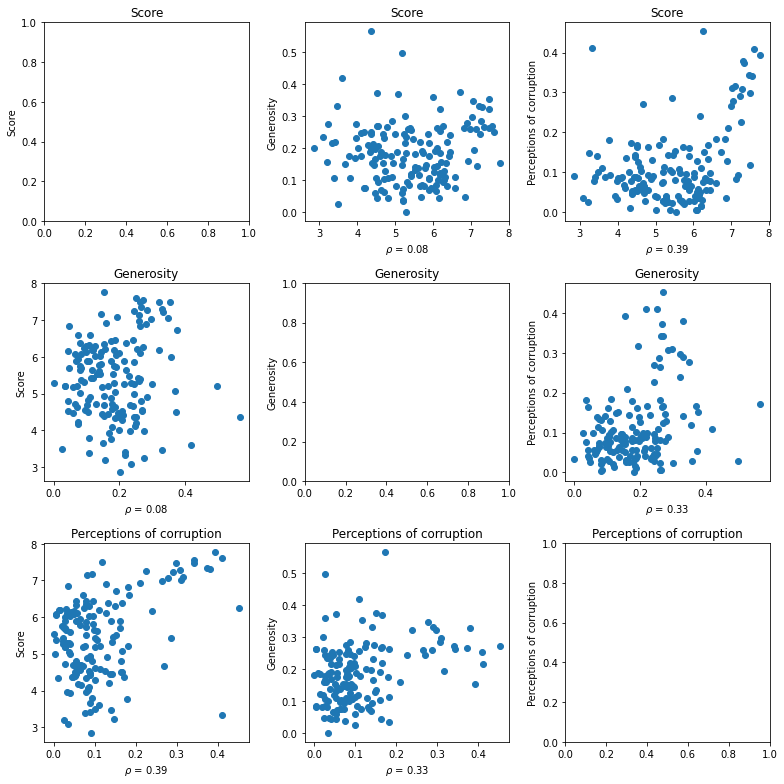

In [14]:
cols = ["Score", 
        "Generosity", 
        "Perceptions of corruption"]

scatterplot_matrix(cols, figsize = (11,11))

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix_with_cors.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```

It's fine to just modify your code from Part B and re-run the examples -- no need for copy/paste. 

Run your code on several different subsets of the columns. Add code cells as needed. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

Response: There appears to be a high positive correlation between Score vs GDP per capita and Score vs Social Support. This is apparent in both the linear trend of the plots as well as in the correlation coefficient of the repective plots which are both high at 0.79 and 0.78. This result makes sense logically because it indicates that countires with high GDP and high social support, both factors that indicate people are living comfortably and well, have the highest positive correlation. This is also supported by what I can see by eye since the numbers in the said columns decrease as the countries decrease in ranking. In contrast, there does not appear to be any negative correlations. If I were to create a model to predict the overall happiness I would use the Social support and GDP per capita column, since based on the data I plotted they seem to have the highest correlation to the Scores of each country. This means that they have a significance in determining the overall happiness score of a country.

## Problem 3: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [19]:
# run this code
# if you get errors, you may need to run the first code block from Problem 2 first. 

import datetime

retrieve_data("https://philchodrow.github.io/PIC16A/datasets/DJI.csv")
DJI = pd.read_csv("data.csv")
DJI['Date'] = pd.to_datetime(DJI['Date'])

retrieve_data("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
COVID = pd.read_csv("data.csv")
COVID['date'] = pd.to_datetime(COVID['date'])

## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

In [30]:
# implement np.diff to find the difference in cases between each day
per_day = np.diff(COVID['cases'])
# Add 1 to the first index so that the length of the data matches the number of days
# We add 1 since we start with 1 Covid case
per_day = np.insert(per_day, 0, 1)
# Create an array for the days
per_day_date = COVID['date']
# Shape is the same
per_day.shape, per_day_date.shape

((302,), (302,))

## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['Date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the trendline. 

Give your plot horizontal and vertical axis labels. 

Text(2020-10-05 00:00:00, 90000, 'Steep increase\nin cases')

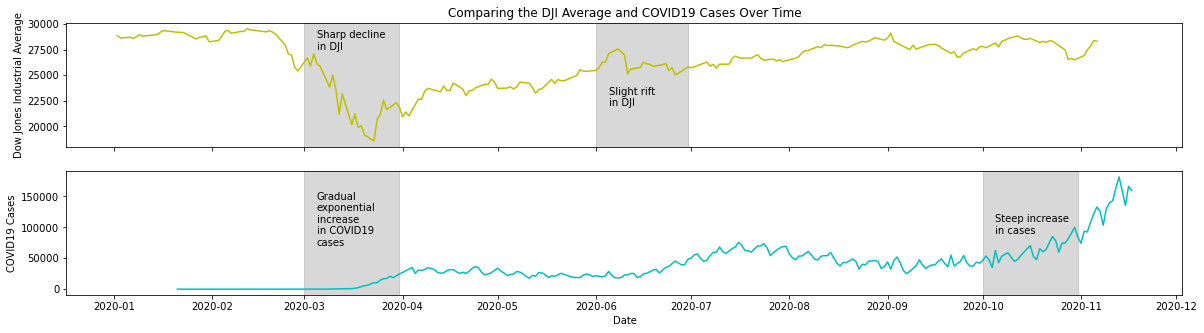

In [31]:
# Create two plots, one on top of the other
fig, ax = plt.subplots(2,1, figsize = (20,5), sharex = True)
# Comapre the date and DJI over time, setting the associated labels
ax[0].plot(DJI['Date'], DJI['Close'], 'y')
ax[0].set(ylabel = "Dow Jones Industrial Average", Title = "Comparing the DJI Average and COVID19 Cases Over Time")
# Comapre the date and Covid cases over time, setting the associated labels
ax[1].plot(per_day_date, per_day, 'c')
ax[1].set(ylabel = "COVID19 Cases", xlabel = "Date")
# Highlight the first sharp decline in the DJI 
ax[0].axvspan(datetime.datetime(2020,6,1),datetime.datetime(2020,6,30), alpha = .3, color = "gray")
# HIghlight the second dip in the DJI
ax[0].axvspan(datetime.datetime(2020,3,1),datetime.datetime(2020,3,31), alpha = .3, color = "gray")
# Highlight the fist increase in Covid cases
ax[1].axvspan(datetime.datetime(2020,3,1),datetime.datetime(2020,3,31), alpha = .3, color = "gray")
# Highlight the steep increse in Covid cases
ax[1].axvspan(datetime.datetime(2020,10,1),datetime.datetime(2020,10,31), alpha = .3, color = "gray")
# Text for the first sharp decline in the DJI 
ax[0].text(datetime.datetime(2020,3,5), 27500, "Sharp decline\nin DJI")
# Text for the second dip in the DJI
ax[0].text(datetime.datetime(2020,6,5), 22000, "Slight rift\nin DJI")
# Text for the fist increase in Covid cases
ax[1].text(datetime.datetime(2020,3,5), 70000, "Gradual\nexponential\nincrease\nin COVID19\ncases")
# Text for the steep increse in Covid cases
ax[1].text(datetime.datetime(2020,10,5), 90000, "Steep increase\nin cases")

## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),datetime.datetime(2020,6,30), alpha = .3, color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 22000, "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization.  